In [ ]:
# Importazione CSV e librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/lucaonnis25/dati/main/SeoulBikeData.csv', sep=',', encoding = 'latin1')

display(df)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

<h1> Legenda delle colonne: <h1>


<h4> Date : year-month-day <h4>
<h4> Rented Bike count - Count of bikes rented at each hour <h4>
<h4> Hour - Hour of he day <h4>
<h4> Temperature-Temperature in Celsius <h4>
<h4> Humidity - % <h4>
<h4> Windspeed - m/s <h4>
<h4> Visibility - 10m <h4>
<h4> Dew point temperature - Celsius <h4>
<h4> Solar radiation - MJ/m2 <h4>
<h4> Rainfall - mm <h4>
<h4> Snowfall - cm <h4>
<h4> Seasons - Winter, Spring, Summer, Autumn <h4>
<h4> Holiday - Holiday/No holiday <h4>
<h4> Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours) <h4>

<h1> Colonna target: Rented Bike Count <h1>

In [ ]:
# # # Controllo come sono distribuiti i dati sulla base della colonna Holiday # # #
# L'idea è quella di vedere se nei periodi festivi sono state affittate più o meno bici rispetto ai periodi non festivi #

# Numero di occorrenze di "No Holiday" nella colonna "Holiday"
conteggio_no_holiday = df['Holiday'].value_counts()['No Holiday']
print("Numero di No Holiday:", conteggio_no_holiday)

# Numero di occorrenze di "Holiday" nella colonna "Holiday"
conteggio_holiday = df['Holiday'].value_counts()['Holiday']
print("Numero di Holiday:", conteggio_holiday)

Numero di No Holiday: 8328
Numero di Holiday: 432


In [ ]:
# # # In questo blocco faccio tutti i calcoli necessari per capire: # # #
# 1) La percentuale di bici affittate durante i periodi festivi
# 2) la percentuale di bici affittate durante il periodo non festivo

# Seleziona solo le righe in cui "Holiday" è uguale a "Holiday"
holiday_rows = df[df['Holiday'] == 'Holiday']

# Calcola la somma della colonna "Rented Bike Count"
sum_rented_bike_count_holiday = holiday_rows['Rented Bike Count'].sum()

# Visualizza il risultato
print("Numero totale di noleggi durante le festività:", sum_rented_bike_count_holiday)

# Calcola la somma della colonna "Rented Bike Count" in tutto il DataFrame
totale_rented_bike_count = df['Rented Bike Count'].sum()

# Visualizza il risultato
print("Totale delle Rented Bike Count in tutto il DataFrame:", totale_rented_bike_count)

# Calcola il totale di "Rented Bike Count" durante le festività
totale_rented_bike_count_holiday = df[df['Holiday'] == 'Holiday']['Rented Bike Count'].sum()



# Calcola la percentuale
percentuale_rented_bike_count_holiday = (totale_rented_bike_count_holiday / totale_rented_bike_count) * 100

# Visualizza il risultato
print("Percentuale di Rented Bike Count durante le festività rispetto al totale:", percentuale_rented_bike_count_holiday, "%")

# Seleziona solo le righe in cui "Holiday" è uguale a "No Holiday"
no_holiday_rows = df[df['Holiday'] == 'No Holiday']

# Calcola la somma della colonna "Rented Bike Count" in queste righe
sum_rented_bike_count_no_holiday = no_holiday_rows['Rented Bike Count'].sum()

# Visualizza il risultato
print("Numero totale di noleggi ESCLUSE le festività:", sum_rented_bike_count_no_holiday)

# Calcola la percentuale per il periodo non festivo
percentuale_rented_bike_count_no_holiday = (sum_rented_bike_count_no_holiday / totale_rented_bike_count) * 100

# Visualizza il risultato
print("Percentuale di Rented Bike Count durante il periodo non festivo rispetto al totale:", percentuale_rented_bike_count_no_holiday, "%")


Numero totale di noleggi durante le festività: 215895
Totale delle Rented Bike Count in tutto il DataFrame: 6172314
Percentuale di Rented Bike Count durante le festività rispetto al totale: 3.497796774435001 %
Numero totale di noleggi ESCLUSE le festività: 5956419
Percentuale di Rented Bike Count durante il periodo non festivo rispetto al totale: 96.502203225565 %


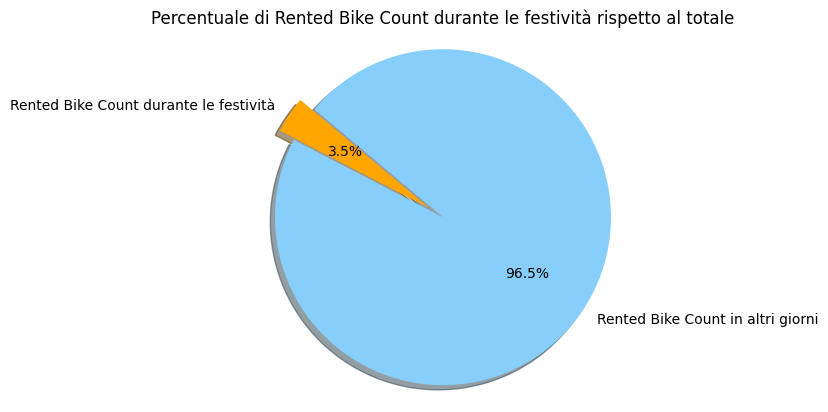

In [ ]:
# # Rappresento i dati in un grafico a torta #

# Dati per il grafico
percentuale_rented_bike_count_holiday = (totale_rented_bike_count_holiday / totale_rented_bike_count) * 100
percentuale_altri_giorni = 100 - percentuale_rented_bike_count_holiday

# Etichette per le fette del grafico
labels = ['Rented Bike Count durante le festività', 'Rented Bike Count in altri giorni']

# Valori percentuali
sizes = [percentuale_rented_bike_count_holiday, percentuale_altri_giorni]

# Colori delle fette
colors = ['orange', 'lightskyblue']

# Offset della fetta "Rented Bike Count durante le festività"
explode = (0.1, 0)

# Crea il grafico a torta
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Titolo del grafico
plt.title('Percentuale di Rented Bike Count durante le festività rispetto al totale')

# Mostra il grafico
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<ipython-input-31-64ea3af24d67>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


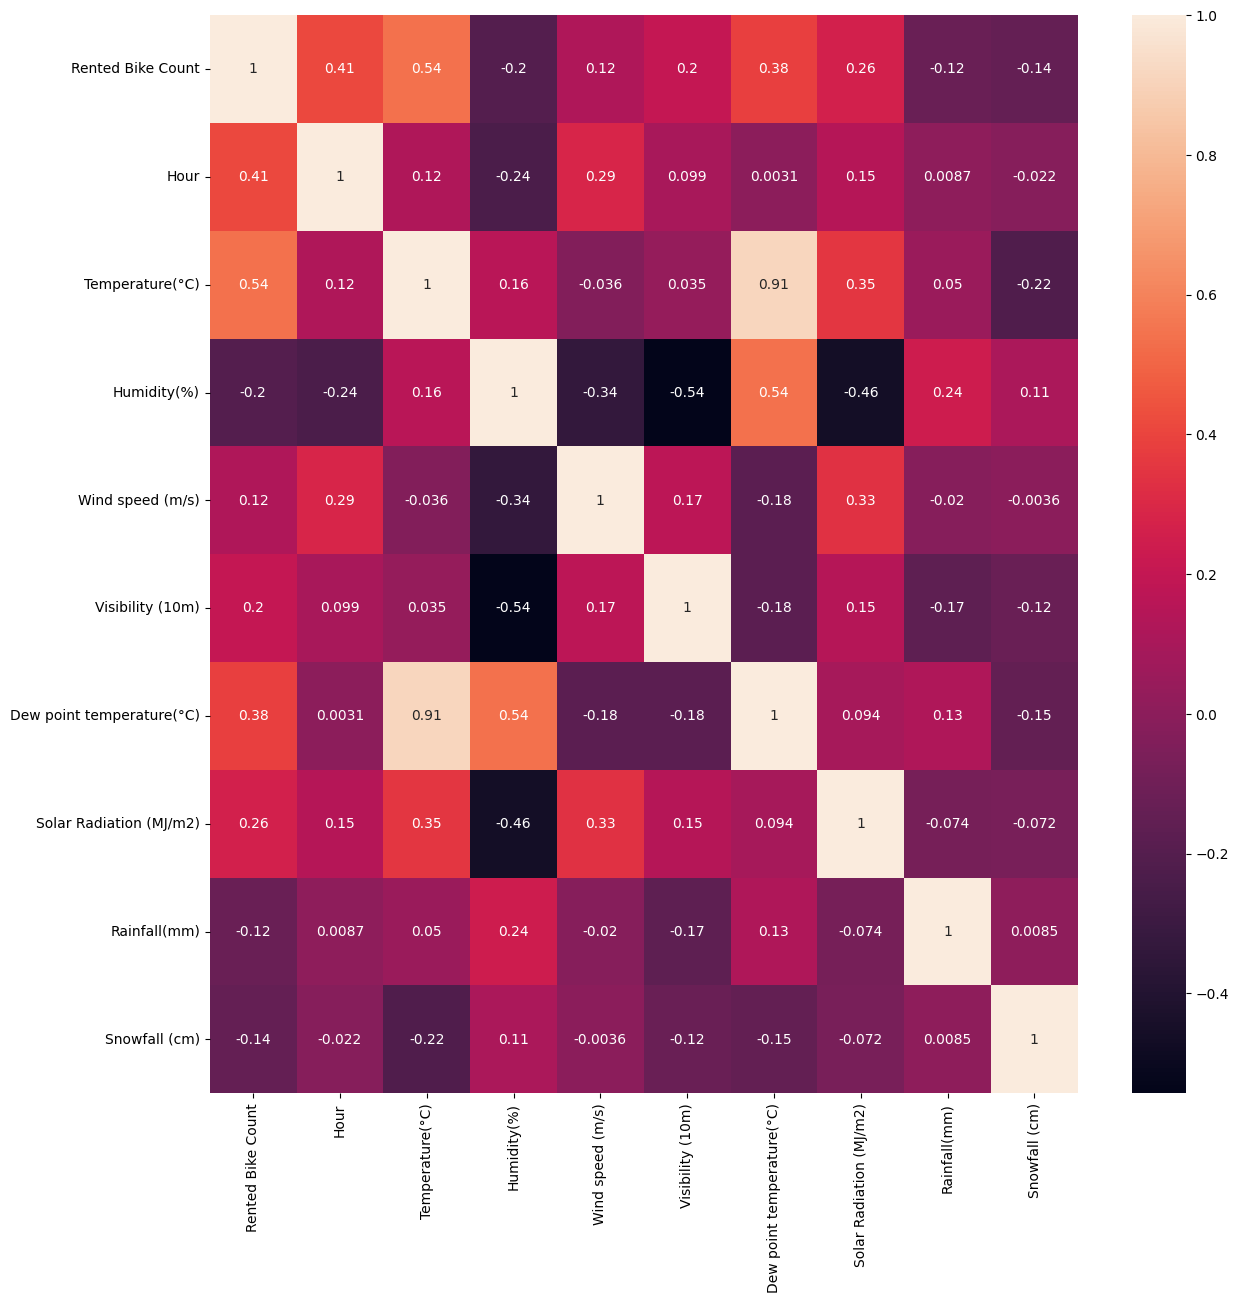

In [ ]:
# # In questo caso voglio capire la correlazioni tra la colonna target 'Rented Bike Count' con le altre colonne

# Matrice di correlazione [DA RIVEDERE]
plt.figure(figsize=(14, 14))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

<ipython-input-32-be507c62f571>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice_correlazione = df_encoded.corr()


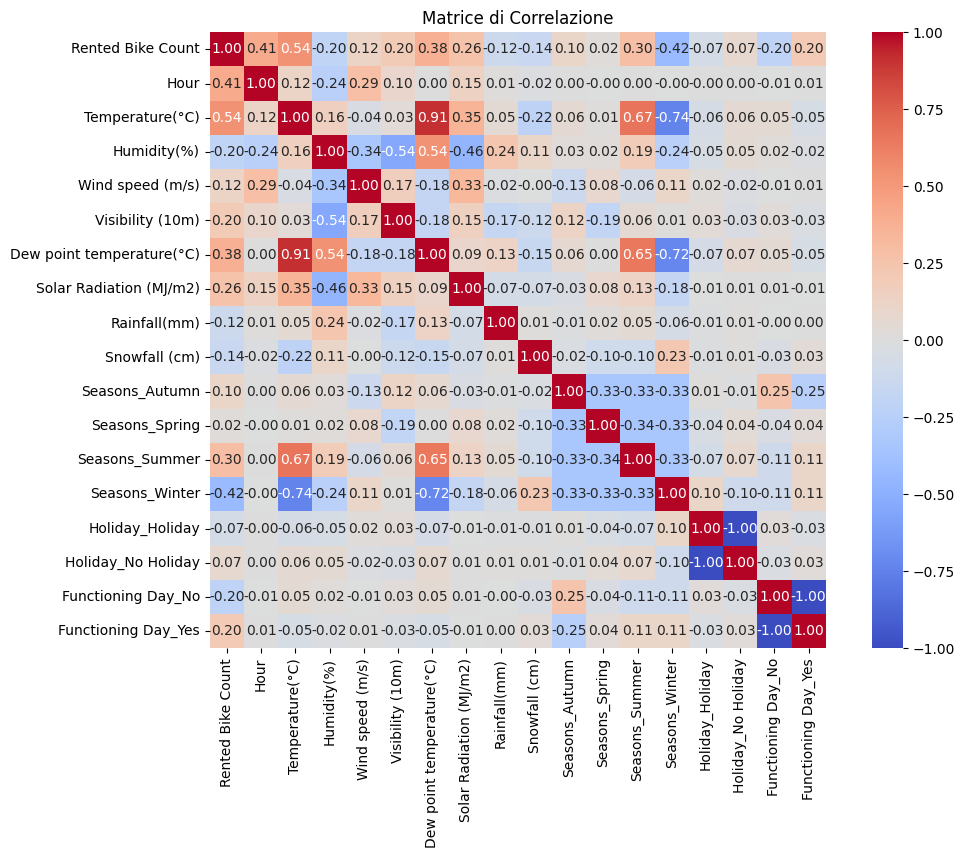

In [ ]:
# # Matrice di correlazione "migliorata" # #
# Prende in considerazione anche le colonne che prima avevano valori di tipo string

# Seleziona le colonne con stringhe da convertire in valori numerici
colonne_da_convertire = ['Seasons', 'Holiday', 'Functioning Day']

# Esegue l'encoding delle colonne usando il metodo get_dummies() per le colonne che hanno stringhe come valori
df_encoded = pd.get_dummies(df, columns=colonne_da_convertire)

# Calcola la matrice di correlazione
matrice_correlazione = df_encoded.corr()

# Crea la heatmap utilizzando seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(matrice_correlazione, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Aggiunge il titolo
plt.title('Matrice di Correlazione')

# Mostra la heatmap
plt.show()

In [ ]:
# # Inizia la parte di pulizia del df # #
# Per questo motivo, opterò per fare una copia del df originale e lavorare da qui in poi con la copia #

# Faccio una copia del df per lavorare sui dati
df_copia = df.copy()
display(df_copia)

# Identifico le colonne che non mi servono per lavorare sui dati
colonne_da_cancellare = ["Wind speed (m/s)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)", "Visibility (10m)"]

# Verifica se le colonne esistono nel DataFrame prima di tentare di rimuoverle
colonne_da_rimuovere = [col for col in colonne_da_cancellare if col in df_copia.columns]

# Rimuovi le colonne specificate dall'asse delle colonne (axis=1)
df_copia.drop(colonne_da_rimuovere, axis=1, inplace=True)

# Display del DataFrame risultante
display(df_copia)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  
0              0.0            0.0  Winter  No Holiday             Yes  
1              0.0            0.0  Winter  No Holiday             Yes  
2              0.0            0.0  Winter  No Holiday             Yes  
3              0.0            0.0  Winter  No Holiday             Yes  
4              0.0            0.0  Winter  No Holiday             Yes  
...            ...            ...     ...         ...             ...  
8755           0.0            0.0  Autumn  No Holiday             Yes  
8756           0.0            0.0  Autumn  No Holiday             Yes  
8757           0.0            0.0  Autumn  No Holiday             Yes  
8758           0.0            0.0  Autumn  No Holiday             Yes  
8759           0.0            0.0  Autumn  No Holiday             Yes  

[8760 rows x 10 columns]

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254    24             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  
0              0.0            0.0  Winter  No Holiday             Yes  
1              0.0            0.0  Winter  No Holiday             Yes  
2              0.0            0.0  Winter  No Holiday             Yes  
3              0.0            0.0  Winter  No Holiday             Yes  
4              0.0            0.0  Winter  No Holiday             Yes  
...            ...            ...     ...         ...             ...  
8755           0.0            0.0  Autumn  No Holiday             Yes  
8756           0.0            0.0  Autumn  No Holiday             Yes  
8757           0.0            0.0  Autumn  No Holiday             Yes  
8758           0.0            0.0  Autumn  No Holiday             Yes  
8759           0.0            0.0  Autumn  No Holiday             Yes  

[8760 rows x 10 columns]

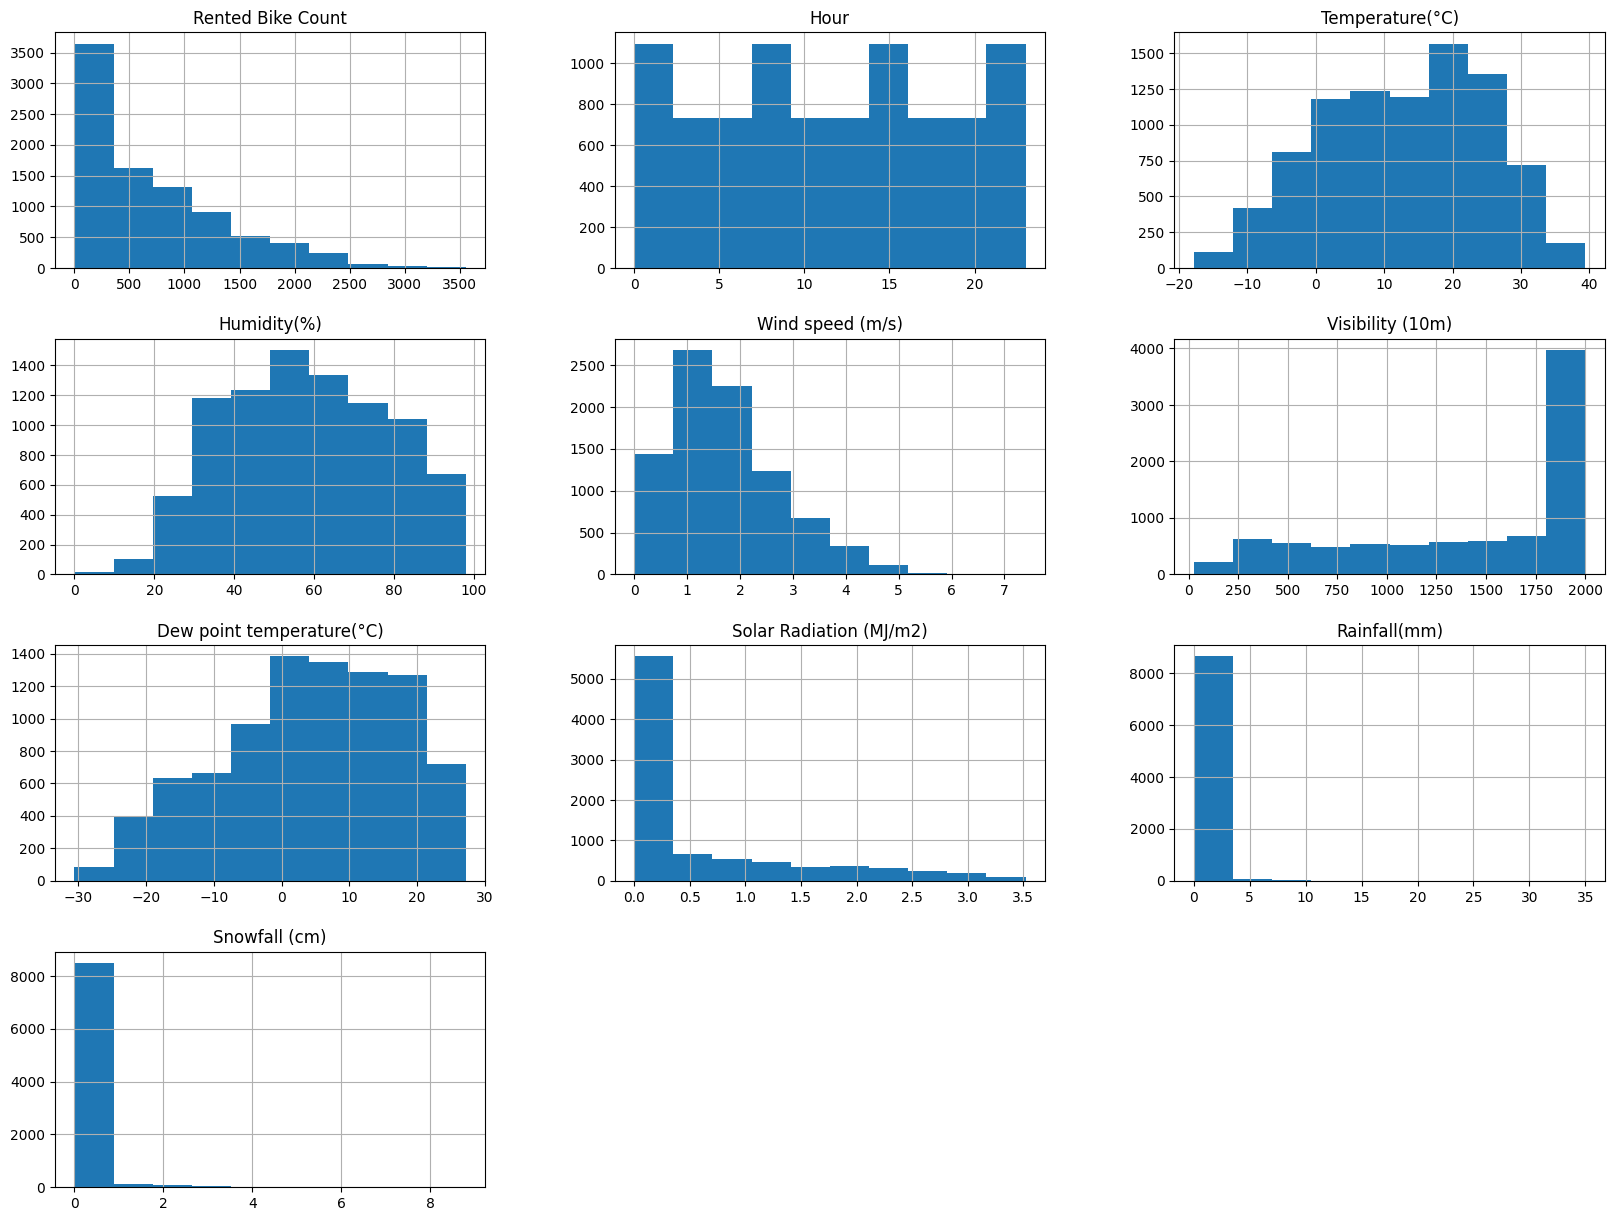

In [ ]:
# # Per evitare che i vari calcoli che farò possano risultare in errori inizio a valutare come scambiare i valori 0 con altri valori #

# In primo luogo modifico la colonna Hour, cambiando il valore 0 con il valore 24 #

# Modifico lo 0 delle ore con 24
df_copia['Hour'] = df_copia['Hour'].replace(0, 24)
display(df_copia)

# Faccio una prima analisi EDA per vedere come sono disposti i dati #
# Analisi EDA
df.hist(figsize=(20,15))
plt.xlabel("Quantity")
plt.ylabel("Record")
plt.title("Analisi EDA", fontsize=15)
plt.show()

In [ ]:
# Describe del Dew point
display(df['Dew point temperature(°C)'].describe())

print('\n')

# Describe della Temperatura
display(df['Temperature(°C)'].describe())

print('\n')

# Describe delle bici affittate
display(df['Rented Bike Count'].describe())

print('\n')

# Describe delle radiazioni solari
display(df['Solar Radiation (MJ/m2)'].describe())

print('\n')

# Describe rainfall
display(df['Holiday'].describe())

print('\n')

count    8760.000000
mean        4.073813
std        13.060369
min       -30.600000
25%        -4.700000
50%         5.100000
75%        14.800000
max        27.200000
Name: Dew point temperature(°C), dtype: float64

count    8760.000000
mean       12.882922
std        11.944825
min       -17.800000
25%         3.500000
50%        13.700000
75%        22.500000
max        39.400000
Name: Temperature(°C), dtype: float64

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

count    8760.000000
mean        0.569111
std         0.868746
min         0.000000
25%         0.000000
50%         0.010000
75%         0.930000
max         3.520000
Name: Solar Radiation (MJ/m2), dtype: float64

count           8760
unique             2
top       No Holiday
freq            8328
Name: Holiday, dtype: object

In [ ]:
# Faccio un subset seguendo l'indice da 0 a 743 (cioe' l'anno 2017)
subset_data = df.iloc[0:744]  # L'intervallo è [0, 743]

# Faccio una describe per l'anno 2017 delle bici affittate
subset_description = subset_data['Rented Bike Count'].describe()

# Stampa
display(subset_description)

count    744.000000
mean     249.099462
std      158.396544
min        3.000000
25%      131.750000
50%      236.500000
75%      329.000000
max      937.000000
Name: Rented Bike Count, dtype: float64

In [ ]:
# Faccio un check sui dati per vedere qual è l'ora in cui ci sono stati più noleggi
ora_con_piu_noleggi = df.groupby('Hour')['Rented Bike Count'].sum().idxmax()

# Visualizza l'ora con il maggior numero di noleggi
print("L'ora con il maggior numero di noleggi è alle", ora_con_piu_noleggi, "ore.")

L'ora con il maggior numero di noleggi è alle 18 ore.


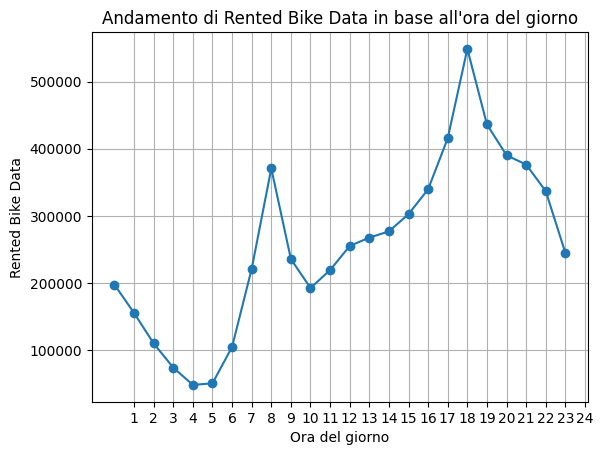

In [ ]:
# Raggruppa il DataFrame per l'ora e calcola la somma di 'Rented Bike Data' in ciascun gruppo
data_per_hour = df.groupby('Hour')['Rented Bike Count'].sum()

# Crea un grafico a linea
plt.plot(data_per_hour.index, data_per_hour.values, marker='o', linestyle='-')

# Etichette per gli assi
plt.xlabel('Ora del giorno')
plt.ylabel('Rented Bike Data')

# Titolo del grafico
plt.title('Andamento di Rented Bike Data in base all\'ora del giorno')

# Imposta l'asse x per mostrare tutti gli orari da 1 a 24
plt.xticks(range(1, 25))

# Mostra il grafico
plt.grid(True)
plt.show()

In [ ]:
# Converti la colonna 'Date' in un formato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Filtra le righe a partire dal 1° dicembre 2017
df_filtrato = df[df['Date'] >= '2017-12-01']

# Estraggo il mese e l'anno dalla colonna 'Date'
df_filtrato['Mese'] = df_filtrato['Date'].dt.month
df_filtrato['Anno'] = df_filtrato['Date'].dt.year

# Raggruppa le righe per mese e calcola la somma di "Rented Bike Count" per ogni mese
total_count_per_month = df_filtrato.groupby(['Anno', 'Mese'])['Rented Bike Count'].sum()

# Visualizza i totali per ogni mese
print(total_count_per_month)

Anno  Mese
2017  12      185330
2018  1       150006
      2       151833
      3       380594
      4       524227
      5       707088
      6       896887
      7       734460
      8       651887
      9       673612
      10      650675
      11      465715
Name: Rented Bike Count, dtype: int64


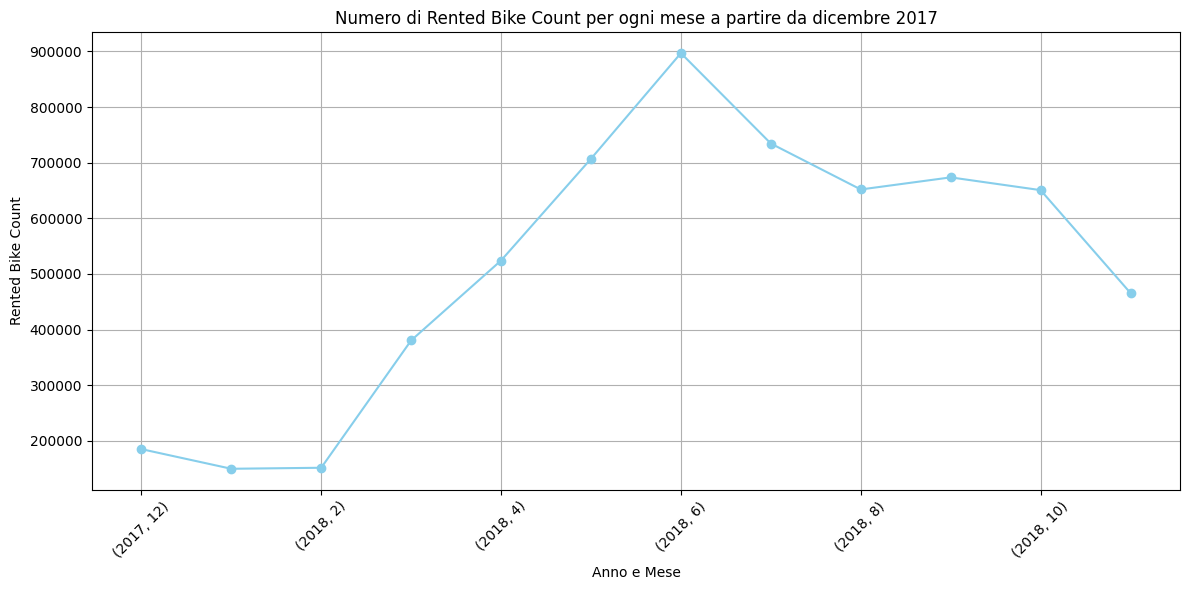

In [ ]:
# Crea un grafico a linee
plt.figure(figsize=(12, 6))  # Imposta le dimensioni del grafico
total_count_per_month.plot(kind='line', marker='o', color='skyblue', linestyle='-')

# Etichette per gli assi
plt.xlabel('Anno e Mese')
plt.ylabel('Rented Bike Count')

# Titolo del grafico
plt.title('Numero di Rented Bike Count per ogni mese a partire da dicembre 2017')

# Mostra il grafico
plt.xticks(rotation=45)  # Ruota le etichette sull'asse x per una migliore leggibilità
plt.tight_layout()  # Imposta il layout in modo che le etichette siano completamente visibili
plt.grid(True)  # Aggiunge la griglia al grafico
plt.show()